# 1 - Hướng đi

- Nguồn tham khảo: chatGPT, github, datacamp, dataquest: 
  - https://github.com/susanli2016/Machine-Learning-with-Python
  - https://github.com/NishkarshRaj/100DaysofMLCode
  - https://github.com/Avik-Jain/100-Days-Of-ML-Code/
- Hold-out và Repeated Hold-out (đánh giá mean results, ổn định hơn) đơn giản, nhanh, dùng trong data lớn hơn. 
- Cross-Validation tận dụng tốt dữ liệu, ước lượng hiệu suất tổng thể, phát hiện và giảm overfitting tốt hơn. 

- Thử nhanh với Hold-out. 
- Thử nhanh Lasso để tìm important features. 
- Hold-out chia data - train: 2/3, 1/3 with: X, X_new1, X-new2. 
- Cross-Validation: train-evaluate Linear Reg, giảm overfitting, tăng hiệu suất with: X, X_new1, X_new2. 



# 2 - Load Data

- Chú ý: Split data sẽ dùng Shuffle = False để dùng data quá khứ train, test bằng data gần hiện tại nhất. 
-> Do đó việc để data theo thứ tự tăng dần của ngày-tháng-năm sẽ tiện trong split hơn. 

In [14]:
# Load Data
import pandas as pd
# data = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/saved_data_ASC.csv")
data = pd.read_csv(r"C:\Users\Administrator\OneDrive - Hanoi University of Science and Technology\ITE10 - Data Science and AI - HUST\20222\ML\Source_Codes\ML20222.PredictionBitcoin\data\saved_data_ASC.csv")
print(data)
print(data.columns)
print(len(data.columns))

            Date  BTC_close  BTC_open  BTC_high  BTC_low  BTC_volume   
0     2010-07-20        0.1       0.1       0.1      0.1        0.26  \
1     2010-07-21        0.1       0.1       0.1      0.1        0.58   
2     2010-07-22        0.1       0.1       0.1      0.1        2.16   
3     2010-07-23        0.1       0.1       0.1      0.1        2.40   
4     2010-07-24        0.1       0.1       0.1      0.1        0.50   
...          ...        ...       ...       ...      ...         ...   
4649  2023-04-12    29886.4   30209.8   30473.0  29679.5       78.69   
4650  2023-04-13    30387.4   29892.4   30524.1  29864.5       65.87   
4651  2023-04-14    30472.5   30387.4   30964.9  30026.0       98.38   
4652  2023-04-15    30299.6   30472.6   30586.5  30208.8       31.71   
4653  2023-04-16    30310.3   30299.2   30545.3  30134.6       34.48   

      Active_Addr_Cnt    Difficulty  Mean_Block_Size(in_bytes)   
0               936.0  1.820000e+02               1.090746e+03  \
1  

# 3 - Train Model use Multi Linear Regression

Multi Linear Regression là gì?
Y = m0 + m1X1 + m2X2 + m3X3 + ... + mNXN 
- Linear Regression: Dependent variable related with independent variable in first order only.
- Multi: More than one independent variable 

## 3.0 Đóng gói def cal metric and draw plot

Coefficient of determination R2: -28.0
Mean Squared Error MSE: 2900.0
Root Mean Squared Error RMSE: 53.85164807134504
Mean Absolute Error MAE: 50.0
Mean Absolute Percentage Error MAPE% 200.0%
Area Under the Curve AUC/Directional Accuracy DA: 0.0
   y_test  y_pred_test
0      10          -10
1      15          -15
2      20          -20
3      25          -25
4      30          -30
5      35          -35
6      40          -40


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4868\2061749665.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


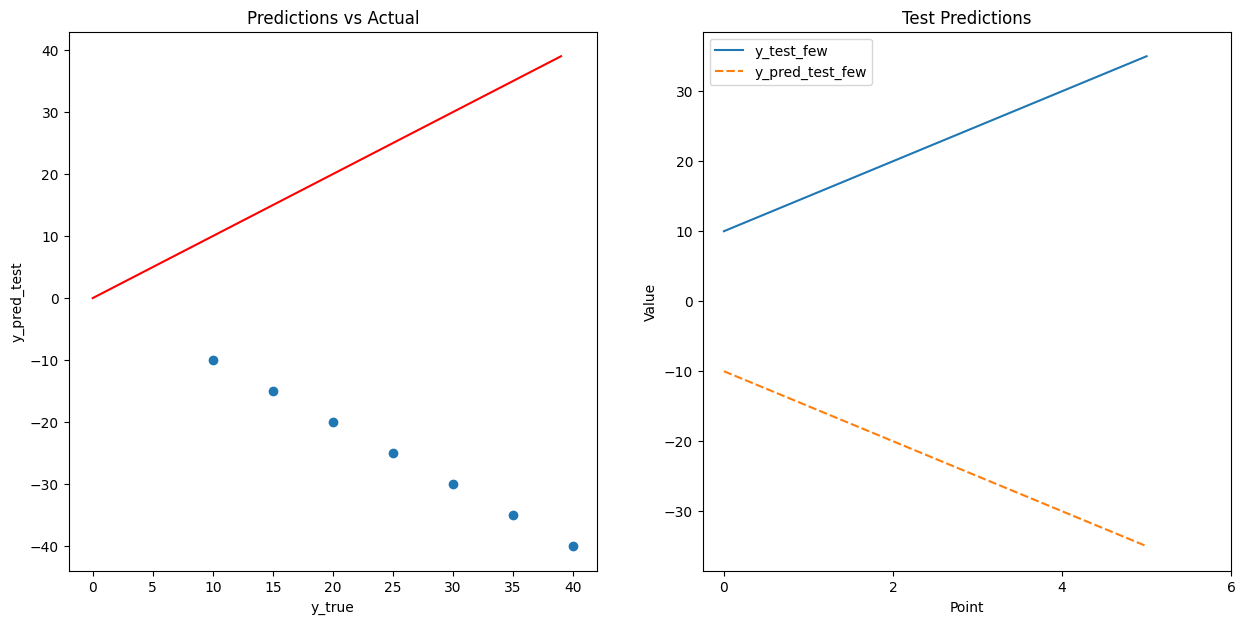

In [15]:
# Đóng gói def Evaluate_Model and def Plot_Model
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def Evaluate_Model(y_test, y_pred_test):
  """
  parameters: `y_test`, `y_pred_test`
  calculates evaluation metrics,
    including R-squared, MSE, RMSE, MAE, MAPE,
      and directional accuracy (DA) 
  """
  print('Coefficient of determination R2:', r2_score(y_test, y_pred_test)) # print(model.score(X_test, y_test))
  print('Mean Squared Error MSE:', mean_squared_error(y_test, y_pred_test))
  print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
  print('Mean Absolute Error MAE:', mean_absolute_error(y_test, y_pred_test))
  MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
  # MAPE = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test)) / y_test))
  print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 2)}%")

  # Calculate Area Under the Curve AUC / Direction Accuracy DA
  y_pred_test_direction = np.sign(np.diff(y_pred_test)) # np.sign chuyển 1/-1
  y_test_direction = np.sign(np.diff(y_test))
  compare = y_pred_test_direction == y_test_direction # compare 
  AUC = np.mean(compare)
  print("Area Under the Curve AUC/Directional Accuracy DA:", AUC)

def Plot_Model(y_test, y_pred_test, num_samples):
  """
  Scatter Plot(Biểu đồ phân tán) with x_axis: y_test, y_axis: y_pred_test
  Print test_pred_df
  Line Plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test 
  """
  # Gộp 2 Plot scatterplot and lineplot
  plt.subplots(figsize=(15,7)) # return tuple (Figure, Axes). obj Figure: toàn bộ hình ảnh, obj Axes: các vùng trực quan. 
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)

  # Scatter plot
  ax1.scatter(y_test, y_pred_test)
  ax1.set_title("Predictions vs Actual")  #plt.title
  ax1.set_xlabel("y_true")                #plt.xlabel
  ax1.set_ylabel("y_pred_test")           #plt.ylabel

  x = range(int(max(y_test))) #vẽ đường chéo giữa.
                              # type y_test from df: <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col 
  ax1.plot(x, 'r') # Opt speed, we can use x = np.arange(int(max(y_test))).astype(int)

  # Line plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test 
  #1 plot vẽ tập Test nhưng show ra x 6000 điểm -> vì plot ra index của hàng ban đầu. 
  #2 Muốn plot ra tập sample với ít điểm giá trị hơn. 
  #3 Muốn plot hiện điểm 1, 2, 3, ... chứ không phải điểm 0.0, 0.5, 1.0, ...
  test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test}) # Create df 3 col: index, y_test, y_pred_test 
  print(test_pred_df)

  test_pred_subset_df = pd.DataFrame({'y_test_few': y_test[:num_samples], 'y_pred_test_few': y_pred_test[:num_samples]}) #2
  test_pred_subset_df = test_pred_subset_df.reset_index(drop=True) #1 Add a reset index and Remove old index
  
  # sns.lineplot(data=test_pred_subset_df) # data = df
  sns.lineplot(data=test_pred_subset_df).set(xticks=range(0, num_samples+1, int(num_samples/5)+1)) 
                                        # set x_axis ticks (dấu kiểm) hiện ít điểm hơn trên x
  ax2.set_title("Test Predictions")
  ax2.set_xlabel("Point") # tên hàng 
  ax2.set_ylabel("Value")
  plt.show() # show những plots above

y_test = [10 , 15, 20, 25, 30, 35, 40]
y_pred_test = [-10, -15, -20, -25, -30, -35, -40]
Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, 6)

## 3.1 Hold-out split data -> train Linear Reg Model

Coefficient of determination R2: 0.9995074702890122
Mean Squared Error MSE: 6012.372914411102
Root Mean Squared Error RMSE: 77.5394926112565
Mean Absolute Error MAE: 28.774954632717993
Mean Absolute Percentage Error MAPE% 65.63%
Area Under the Curve AUC/Directional Accuracy DA: 0.6723989681857265
      y_test  y_pred_test
0        0.1    11.353256
1        0.1    11.251517
2        0.1     2.504927
3        0.1     2.535701
4        0.1     2.569870
...      ...          ...
3485  9296.6  9461.184322
3486  9193.9  9247.114683
3487  9611.8  9609.280867
3488  9772.0  9739.248618
3489  9818.6  9805.655740

[3490 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4868\2061749665.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


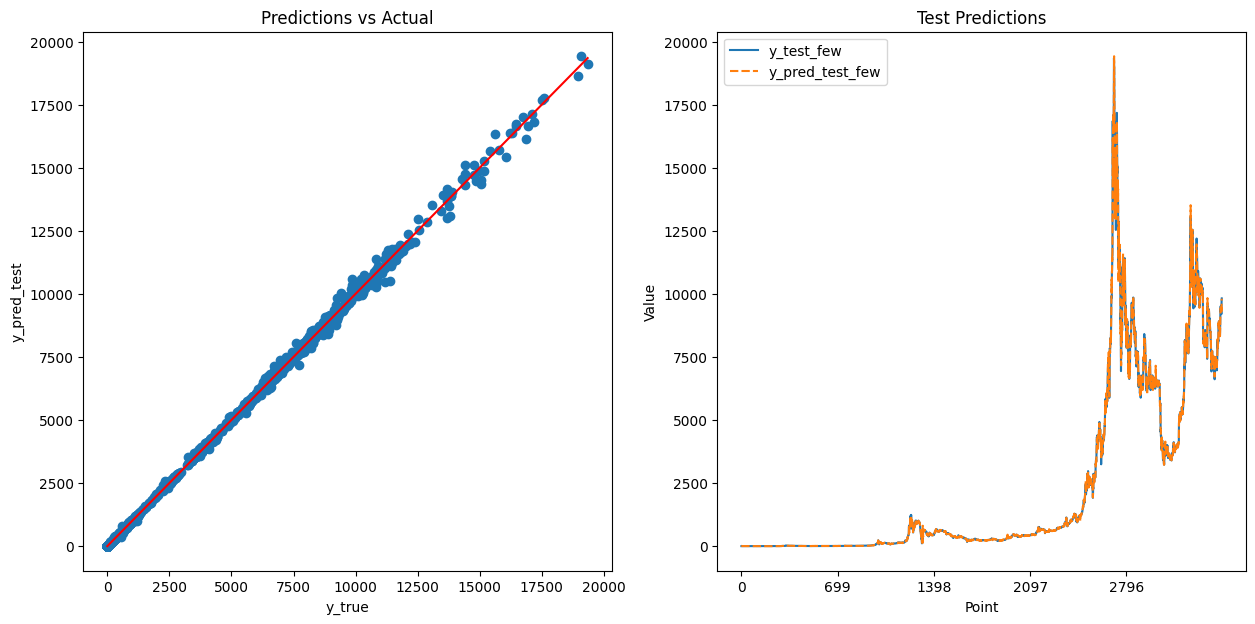

Coefficient of determination R2: 0.9988843644930069
Mean Squared Error MSE: 296014.6796303773
Root Mean Squared Error RMSE: 544.0723110307832
Mean Absolute Error MAE: 343.8233560264294
Mean Absolute Percentage Error MAPE% 1.12%
Area Under the Curve AUC/Directional Accuracy DA: 0.763542562338779
       y_test   y_pred_test
3490   9895.5   9787.942466
3491  10151.5  10074.224654
3492   9854.1   9905.510152
3493  10229.5  10131.272434
3494  10317.7  10374.377456
...       ...           ...
4649  29886.4  30059.649947
4650  30387.4  30393.426727
4651  30472.5  30643.915307
4652  30299.6  30374.208878
4653  30310.3  30389.252663

[1164 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4868\2061749665.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


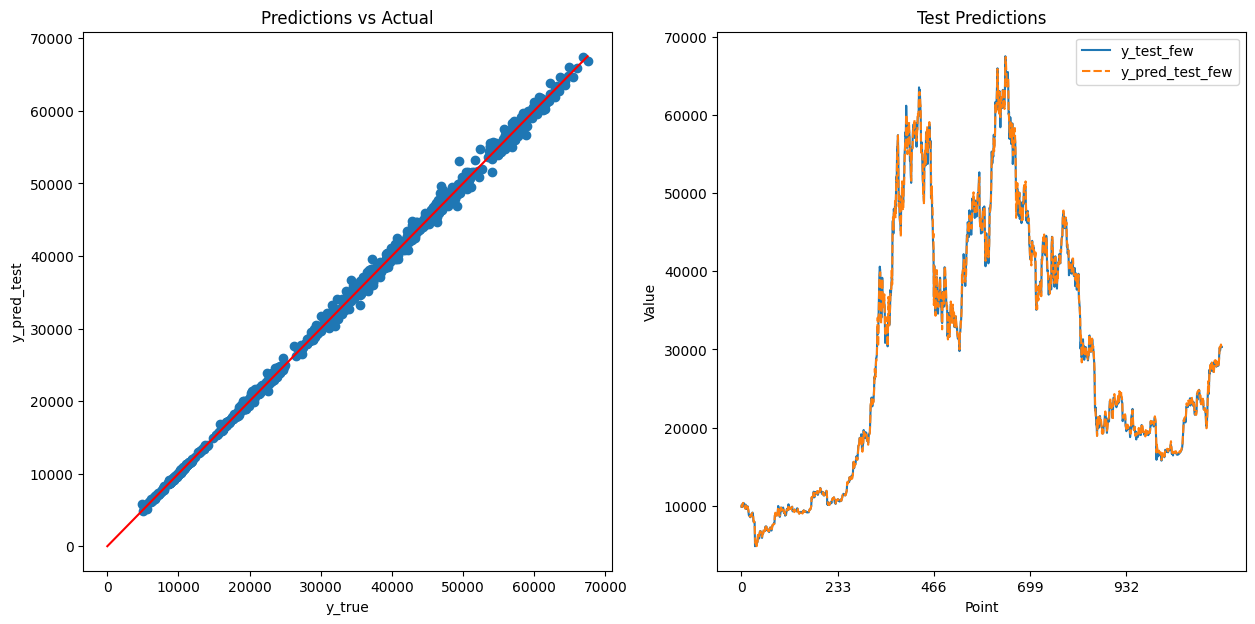

In [16]:
# Hold-out train Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop(['BTC_close', 'Date'], axis=1)
y = data['BTC_close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = False) # shuffle: default: True, False sẽ giúp dùn qk để train và dự báo cho tương lai. 
reg_model = LinearRegression()   # shuffle: default: True, False sẽ giúp dùn qk để train và dự báo cho tương lai. 
reg_model.fit(X_train,y_train)

y_pred_train = reg_model.predict(X_train)
Evaluate_Model(y_train, y_pred_train)
Plot_Model(y_train, y_pred_train, len(y_train))

y_pred_test = reg_model.predict(X_test)
Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, len(y_test))


##  3.2 Lasso and Ridge reg

- "Regularization": "điều chuẩn": thêm norm L1 và norm L2 của vector hệ số vào hàm mất mát để giảm thiểu giá trị của hệ số. giảm thiểu overfitting và nâng cao tính tổng quát của mô hình.
- Khác với việc chuẩn hoá dữ liệu là một bước tiền xử lý dữ liệu nhằm giúp các biến đầu vào có cùng scale và phân bố -> giúp cho các mô hình có khả năng tổng quát hóa cao hơn. Tuy nhiên, việc chuẩn hoá dữ liệu không giải quyết được vấn đề overfitting, mà chỉ là một bước giúp cho mô hình hoạt động tốt hơn. 
- Sự khác nhau: 
1. Cách chọn biến: Trong Ridge Regression, tất cả các biến đều được chọn và giảm trọng số, trong khi đó, Lasso Regression sử dụng một kỹ thuật gọi là L1 regularization để xóa các biến không quan trọng hoàn toàn bằng cách thiết lập trọng số của chúng thành 0.

2. Tính chất của trọng số: Trong Ridge Regression, trọng số của các biến sẽ tiếp tục giảm dần khi ta gia tăng độ lớn của tham số `alpha`. Tuy nhiên, trong Lasso Regression, các trọng số sẽ trở thành 0 sau khi `alpha` vượt qua một ngưỡng cố định, 

- Ưu điểm và nhược điểm của Lasso Regression và Ridge Regression:

- Lasso Regression:
    - Ưu điểm:
        - Có khả năng chọn và loại bỏ các biến không quan trọng hoàn toàn, giúp cải thiện tính tổng quát của mô hình.
        - Thích hợp cho việc xử lý các bộ dữ liệu có số lượng biến lớn.
    - Nhược điểm:
        - Tính toán phức tạp hơn so với Ridge Regression vì phải giải quyết bài toán tối ưu với ràng buộc L1 regularization.
        - Không thể xử lý được khi một số biến đầu vào liên tục và có tương quan cao.

- Ridge Regression:
    - Ưu điểm:
        - Cho phép lựa chọn tất cả các biến đầu vào trong mô hình.
        - Thời gian tính toán nhanh hơn so với Lasso Regression.
        - Được sử dụng để xử lý các bộ dữ liệu có nhiễu hoặc có sự tương quan mạnh giữa các biến đầu vào.
    - Nhược điểm:
        - Không thể loại bỏ các biến đầu vào không quan trọng hoàn toàn, do đó không hiệu quả trong việc xử lý các bộ dữ liệu có số lượng biến lớn.

Sau khi đã train một model sử dụng Linear Regression, việc áp dụng Lasso hoặc Ridge Regression có thể giúp cải thiện độ chính xác của model bằng cách giảm overfitting.

Lasso và Ridge Regression là hai phương pháp regularization được sử dụng để tránh việc overfitting. Lasso sử dụng L1 regularization để đưa các hệ số tương ứng với các biến không quan trọng xuống gần với 0. Điều này có nghĩa là Lasso có thể loại bỏ những biến không quan trọng khỏi model. Theo cách này, Lasso cho phép lựa chọn đặc trưng tự động và giảm thiểu sự phụ thuộc vào đặc trưng.

Trong khi đó, Ridge sử dụng L2 regularization để đẩy các hệ số tương ứng với các biến không quan trọng về gần 0, nhưng không bao giờ giảm xuống 0 hoàn toàn. Cách tiếp cận này giúp giảm hiện tượng overfitting bằng cách giảm giá trị tuyệt đối của các hệ số tương ứng với các biến.

Vì vậy, sau khi đã train một model sử dụng Linear Regression, bạn có thể sử dụng Lasso hoặc Ridge Regression để giảm overfitting và cải thiện độ chính xác của model. Việc sử dụng Lasso hay Ridge Regression phụ thuộc vào nhiều yếu tố, bao gồm số lượng đặc trưng và mức độ ảnh hưởng của từng đặc trưng trong model.

In [17]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.5, solver='lsqr') # lsqr: tối ưu
ridge_model.fit(X_train, y_train)
score_ridge = ridge_model.score(X_train, y_train) # score == r2

y_pred_test_ridge = ridge_model.predict(X_test)

Evaluate_Model(y_test, y_pred_test_ridge)

Coefficient of determination R2: -0.46405140202995265
Mean Squared Error MSE: 388460840.4965024
Root Mean Squared Error RMSE: 19709.409947953856
Mean Absolute Error MAE: 15006.05558321134
Mean Absolute Percentage Error MAPE% 47.2%
Area Under the Curve AUC/Directional Accuracy DA: 0.5073086844368013


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.819e+06, tolerance: 2.762e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.866e+06, tolerance: 2.803e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

Best_alpha_Lasso: 100


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.274e+08, tolerance: 3.650e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4868\2061749665.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


Coefficient of determination R2: 0.9963179227101521
Mean Squared Error MSE: 632283.8875345157
Root Mean Squared Error RMSE: 795.1628056785074
Mean Absolute Error MAE: 627.9351784972165
Mean Absolute Percentage Error MAPE% 1.93%
Area Under the Curve AUC/Directional Accuracy DA: 0.666189111747851
       y_test   y_pred_test
3955  42897.3  43843.261162
3956  36720.5  39220.262463
3957  40717.2  39314.271701
3958  37297.4  39035.087734
3959  37448.3  37135.265272
...       ...           ...
4649  29886.4  29604.197149
4650  30387.4  29616.118560
4651  30472.5  29956.107274
4652  30299.6  29794.435581
4653  30310.3  29648.064454

[699 rows x 2 columns]


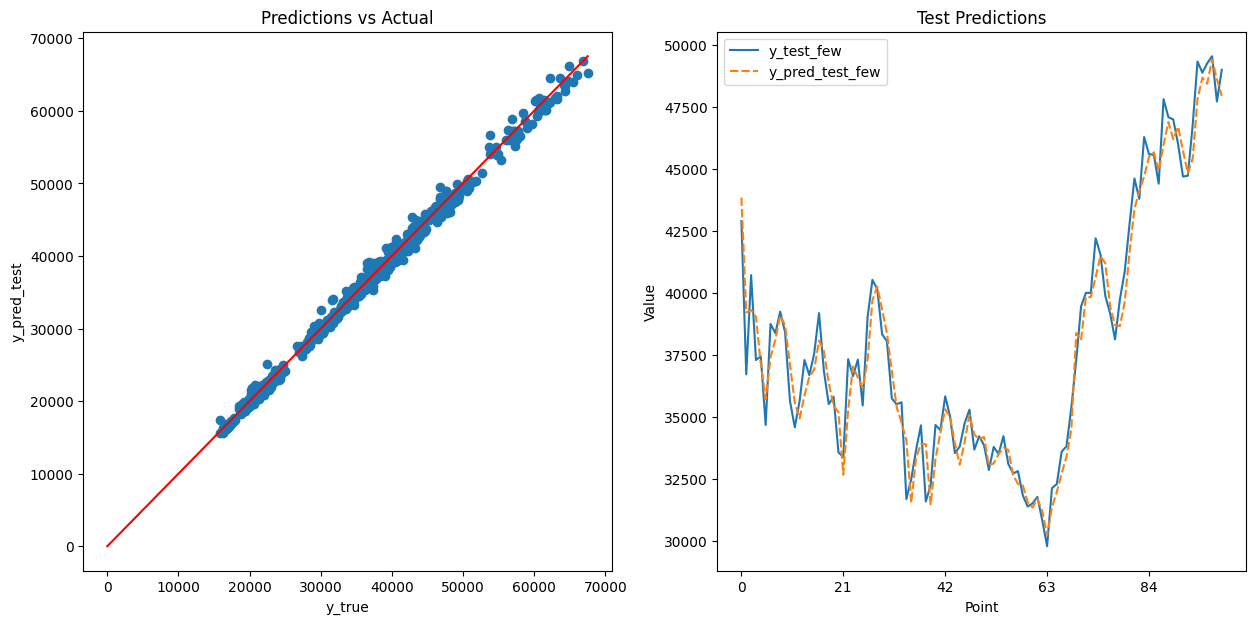

Important features: Index(['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'Active_Addr_Cnt',
       'Difficulty', 'Mean_Block_Size(in_bytes)', 'Sum_Block_Weight',
       'Total_Fees(USD)', 'Mean_Hashrate', 'Xfer_Cnt',
       'Mean_Tx_size(native_units)', 'ETH', 'LTC', 'GOLD', 'COPPER', 'S&P500',
       'DJI', 'JP225'],
      dtype='object')


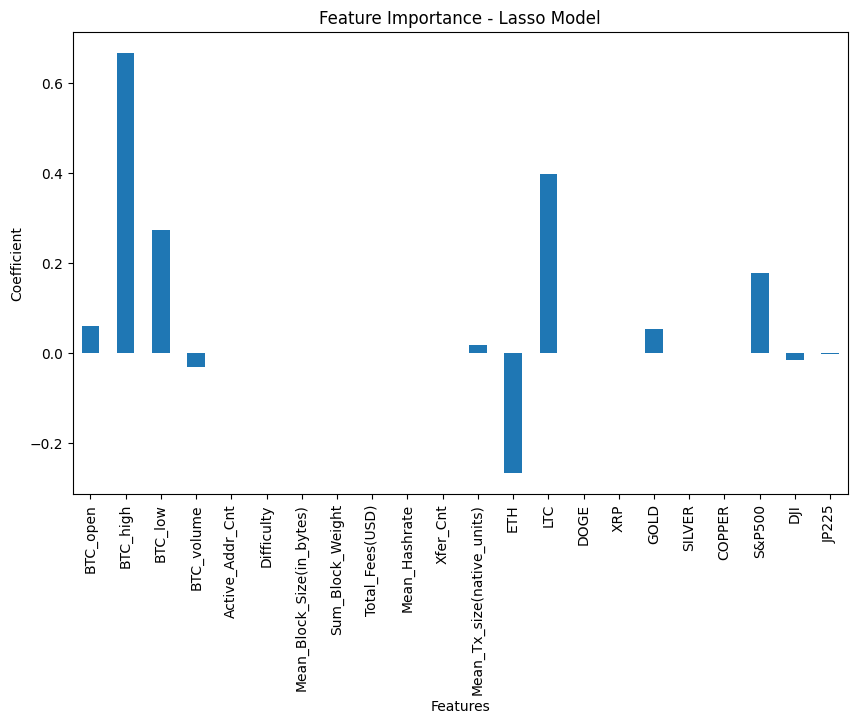

In [28]:
# Lasso tìm important features.
# Hold-out chia Train, Valid, Test: 0.7-0.15-0.15 -> alpha tốt nhất Lasso. 

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
import pandas as pd

# Chia train, valid, test: 1-... = 0.7, (0.15/0.85)*0.85=0.15, 015
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.15/0.85, random_state=42, shuffle=False)

# Huấn luyện mô hình Lasso để tìm alpha tốt nhất
lasso_model = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}  # create parameter

grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(X_train, y_train) 

print('Best_alpha_Lasso:', grid_search.best_params_['alpha']) # lấy best alpha 

# Use best_alpha train lại model trên toàn bộ train valid
best_alpha = grid_search.best_params_['alpha']
lasso_model_best_alpha = Lasso(alpha=best_alpha)
lasso_model_best_alpha.fit(X_train_valid, y_train_valid)

y_pred_test_lasso = lasso_model_best_alpha.predict(X_test)
Evaluate_Model(y_test, y_pred_test_lasso)
Plot_Model(y_test, y_pred_test_lasso, 100)
# Quan sát coef của các features: intercept = lasso_model_best_alpha.intercept_ # bias: hệ số điều chỉnh 
coef_np = lasso_model_best_alpha.coef_      # <class 'numpy.ndarray'>
coef_pdSeries = pd.Series(lasso_model_best_alpha.coef_, index=X.columns) # tạo pandas Series obj chứa coef_ và index/gán nhãn nó = tên cột của X
        # <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col, tuple (index)

# Hiển thị các important features
important_features = X.columns[coef_np != 0]
print('Important features:', important_features)

# Bar plot important features. 
plt.figure(figsize=(10, 6))
coef_pdSeries.plot(kind='bar')

plt.title('Feature Importance - Lasso Model')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()


In [19]:
# Quan sát thêm về data type

print(coef_np, type(coef_np)) 
print(coef_pdSeries, type(coef_pdSeries))

Important features: Index(['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'Active_Addr_Cnt',
       'Difficulty', 'Mean_Block_Size(in_bytes)', 'Sum_Block_Weight',
       'Total_Fees(USD)', 'Mean_Hashrate', 'Xfer_Cnt',
       'Mean_Tx_size(native_units)', 'ETH', 'LTC', 'GOLD', 'COPPER', 'S&P500',
       'DJI', 'JP225'],
      dtype='object')
[ 6.09222087e-02  6.66562699e-01  2.73246610e-01 -3.08459511e-02
  2.12234130e-04 -1.62330867e-11  1.23897791e-05 -2.86968563e-07
 -1.66183382e-05  9.78897358e-07  1.41533931e-05  1.68748570e-02
 -2.65966472e-01  3.97120476e-01 -0.00000000e+00  0.00000000e+00
  5.35516035e-02  0.00000000e+00  1.01720821e-03  1.77051965e-01
 -1.54630825e-02 -1.55315726e-03] <class 'numpy.ndarray'>
BTC_open                      6.092221e-02
BTC_high                      6.665627e-01
BTC_low                       2.732466e-01
BTC_volume                   -3.084595e-02
Active_Addr_Cnt               2.122341e-04
Difficulty                   -1.623309e-11
Mean_Block_Siz

### Important features Lasso Linear Regression: 
giải thích: 2.73e-01 = 0.273
1. 3 features nổi bật trên bar 
['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'Mean_Tx_size(native_units)', 'ETH', 'LTC', 'GOLD', 'COPPER', 'S&P500','DJI', 'JP225']

Actions: 
1. Thử nghiệm với các important features. (Loại bỏ các features không quan trọng hoặc có thể gây nhiễu).
2. Lựa chọn mô hình khác: Các important features có thể chỉ ra rằng mô hình tuyến tính như Linear Regression không đủ mạnh để mô hình hóa quan hệ phức tạp giữa các biến. Bạn có thể thử nghiệm các mô hình khác như Decision Tree, Random Forest, hoặc Gradient Boosting để xem liệu chúng có thể xử lý tốt hơn các important features.
3. Thử nghiệm các tổ hợp features: thử nghiệm các tổ hợp của các important features, (Có thể thêm hoặc nhân các features lại với nhau để tạo ra các features mới) -> subset features cải thiện hiệu suất.
Note: Việc lựa chọn quá nhiều hoặc quá ít features có thể ảnh hưởng đến hiệu suất model. -> đánh giá,thử nghiệm. 

In [20]:
X_new1 = data[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'Active_Addr_Cnt',
       'Difficulty', 'Mean_Block_Size(in_bytes)', 'Sum_Block_Weight',
       'Total_Fees(USD)', 'Mean_Hashrate', 'Xfer_Cnt',
       'Mean_Tx_size(native_units)', 'ETH', 'LTC', 'GOLD', 'COPPER', 'S&P500',
       'DJI', 'JP225']]
X_new2 = data[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'Mean_Tx_size(native_units)', 'ETH', 'LTC', 'GOLD', 'COPPER', 'S&P500','DJI', 'JP225']]

Coefficient of determination R2: 0.9989101386056467
Mean Squared Error MSE: 289175.9624615259
Root Mean Squared Error RMSE: 537.7508367836595
Mean Absolute Error MAE: 341.8346614164271
Mean Absolute Percentage Error MAPE% 1.1%
Area Under the Curve AUC/Directional Accuracy DA: 0.7626827171109201
       y_test   y_pred_test
3490   9895.5   9787.949450
3491  10151.5  10074.213616
3492   9854.1   9905.241369
3493  10229.5  10131.166943
3494  10317.7  10373.930597
...       ...           ...
4649  29886.4  29987.844708
4650  30387.4  30317.142550
4651  30472.5  30565.833973
4652  30299.6  30296.344230
4653  30310.3  30309.093852

[1164 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4868\2061749665.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


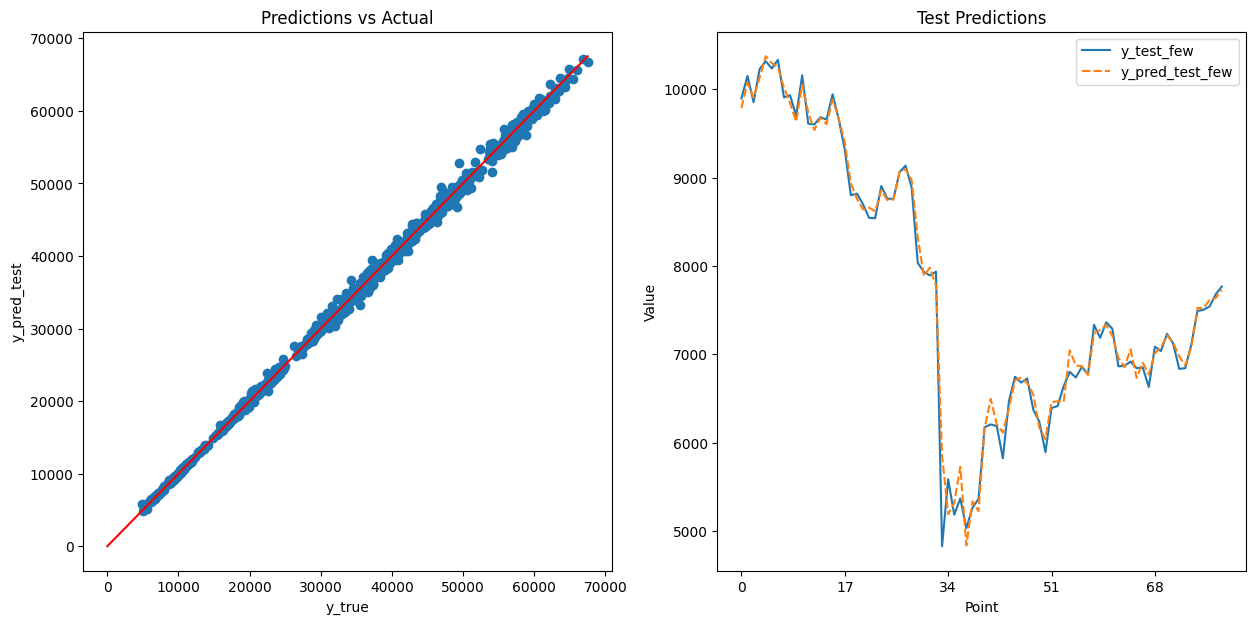

Coefficient of determination R2: 0.9989229450776723
Mean Squared Error MSE: 285777.98553261446
Root Mean Squared Error RMSE: 534.5820662280156
Mean Absolute Error MAE: 340.6278415743547
Mean Absolute Percentage Error MAPE% 1.12%
Area Under the Curve AUC/Directional Accuracy DA: 0.7609630266552021
       y_test   y_pred_test
3490   9895.5   9783.335968
3491  10151.5  10065.290210
3492   9854.1   9901.606715
3493  10229.5  10121.747095
3494  10317.7  10355.046367
...       ...           ...
4649  29886.4  29963.735410
4650  30387.4  30263.007211
4651  30472.5  30508.730858
4652  30299.6  30255.890137
4653  30310.3  30256.087070

[1164 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4868\2061749665.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


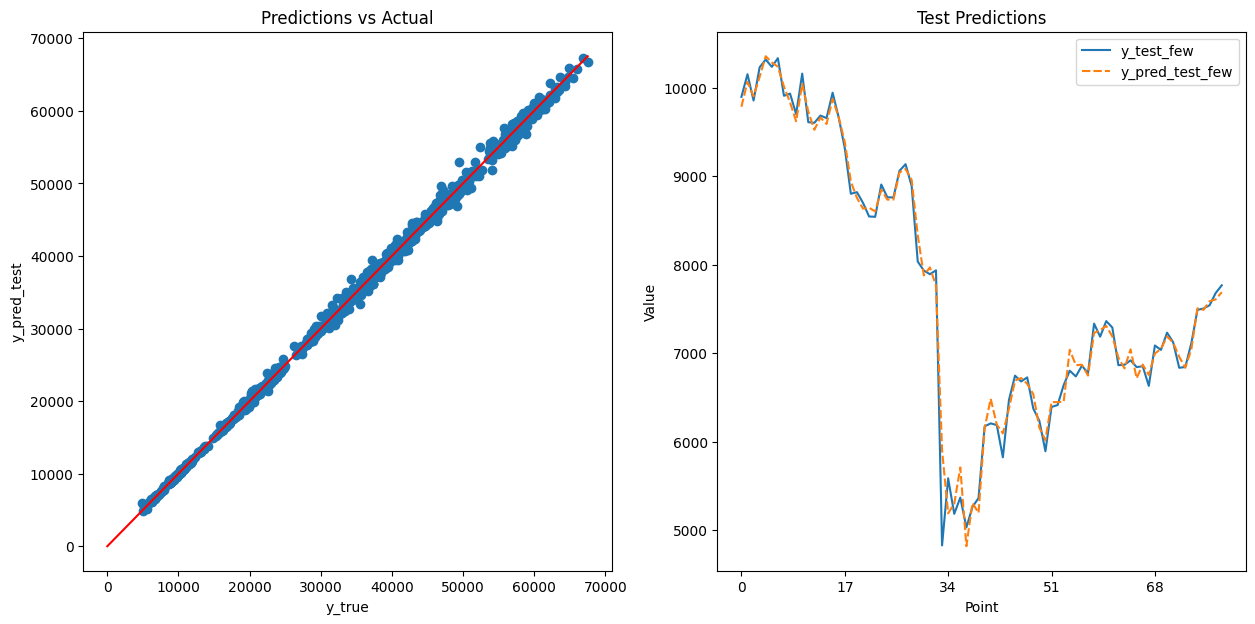

In [21]:
# Hold-out với X_new1, X_new2

X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.25, random_state=42, shuffle = False)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, 80)

X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.25, random_state=42, shuffle = False)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, 80)

Coefficient of determination R2: -0.04861273506912256
Mean Squared Error MSE: 289925986.6785536
Root Mean Squared Error RMSE: 17027.213121311237
Mean Absolute Error MAE: 13865.325772615037
Mean Absolute Percentage Error MAPE% 60.97%
Area Under the Curve AUC/Directional Accuracy DA: 0.5007163323782235
       y_test   y_pred_test
3257   9517.0   8372.984793
3258  10179.3   8372.984789
3259  10721.7   8372.984792
3260  10897.1   8372.984804
3261  11046.4   8372.984805
...       ...           ...
4649  29886.4  50347.836263
4650  30387.4  50347.836256
4651  30472.5  50347.836255
4652  30299.6  50347.836262
4653  30310.3  50347.836249

[1397 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4868\2061749665.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


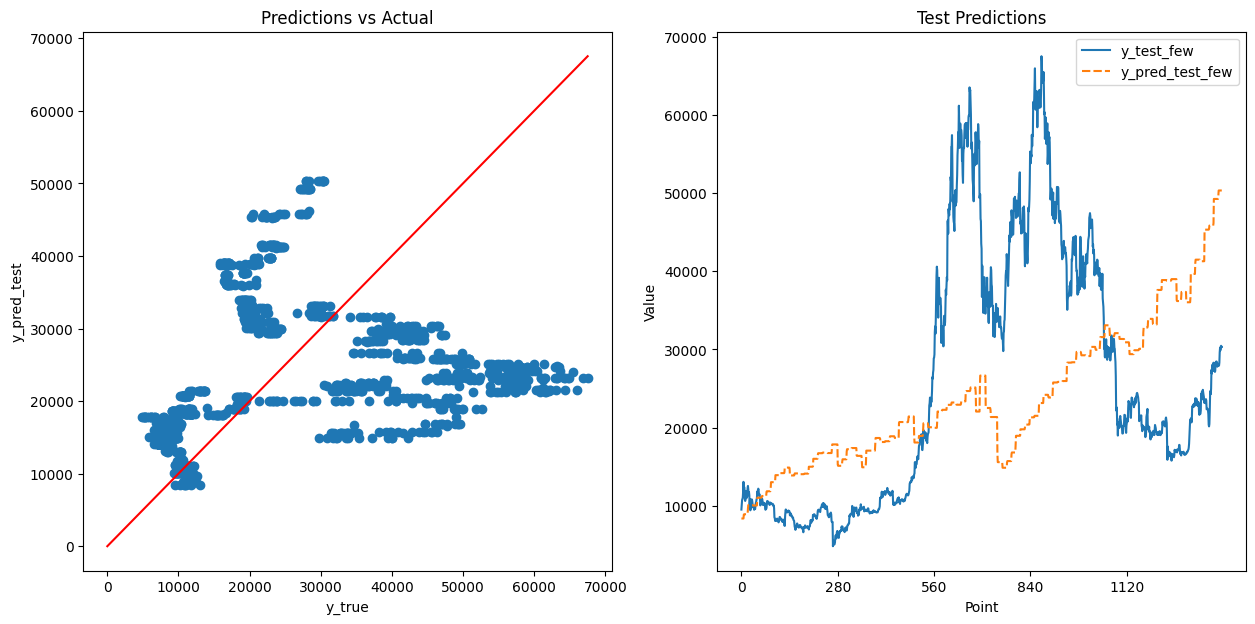

Coefficient of determination R2: 0.9991081804674246
Mean Squared Error MSE: 246574.97403376177
Root Mean Squared Error RMSE: 496.56316217955776
Mean Absolute Error MAE: 302.9058471380176
Mean Absolute Percentage Error MAPE% 1.12%
Area Under the Curve AUC/Directional Accuracy DA: 0.7593123209169055
       y_test   y_pred_test
3257   9517.0   9449.370930
3258  10179.3  10045.515477
3259  10721.7  10920.558785
3260  10897.1  11131.777147
3261  11046.4  10872.042177
...       ...           ...
4649  29886.4  29955.060436
4650  30387.4  30239.502949
4651  30472.5  30497.346797
4652  30299.6  30224.314124
4653  30310.3  30222.746381

[1397 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4868\2061749665.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


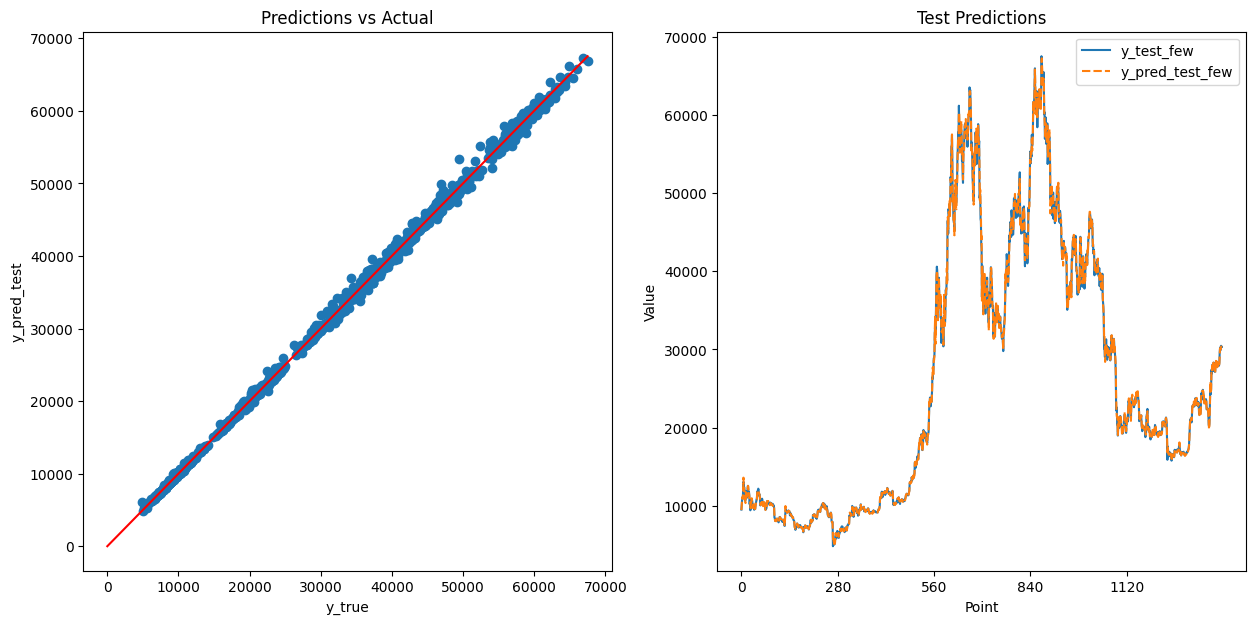

In [22]:
# Ridge Regression with X_new1, X_new2
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.3, random_state=42, shuffle=False)
ridge_model = Ridge(alpha = 0.5, solver='lsqr') # lsqr: tối ưu
ridge_model.fit(X_train, y_train)
y_pred_test_ridge = ridge_model.predict(X_test)
Evaluate_Model(y_test, y_pred_test_ridge)
Plot_Model(y_test, y_pred_test_ridge, len(y_test))

X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.3, random_state=42, shuffle=False)
ridge_model = Ridge(alpha = 0.5, solver='lsqr') # lsqr: tối ưu
ridge_model.fit(X_train, y_train)
y_pred_test_ridge = ridge_model.predict(X_test)
Evaluate_Model(y_test, y_pred_test_ridge)
Plot_Model(y_test, y_pred_test_ridge, len(y_test))


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.593e+06, tolerance: 2.762e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.609e+06, tolerance: 2.803e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

Best_alpha_Lasso: 1000
Coefficient of determination R2: 0.9966806981456202
Mean Squared Error MSE: 569988.328646533
Root Mean Squared Error RMSE: 754.975713944848
Mean Absolute Error MAE: 563.9260908759072
Mean Absolute Percentage Error MAPE% 1.66%
Area Under the Curve AUC/Directional Accuracy DA: 0.671919770773639
       y_test   y_pred_test
3955  42897.3  44017.664010
3956  36720.5  39270.425909
3957  40717.2  39505.417247
3958  37297.4  39149.002833
3959  37448.3  37263.292876
...       ...           ...
4649  29886.4  29852.970069
4650  30387.4  29907.609074
4651  30472.5  30257.194510
4652  30299.6  30061.928552
4653  30310.3  30000.287348

[699 rows x 2 columns]


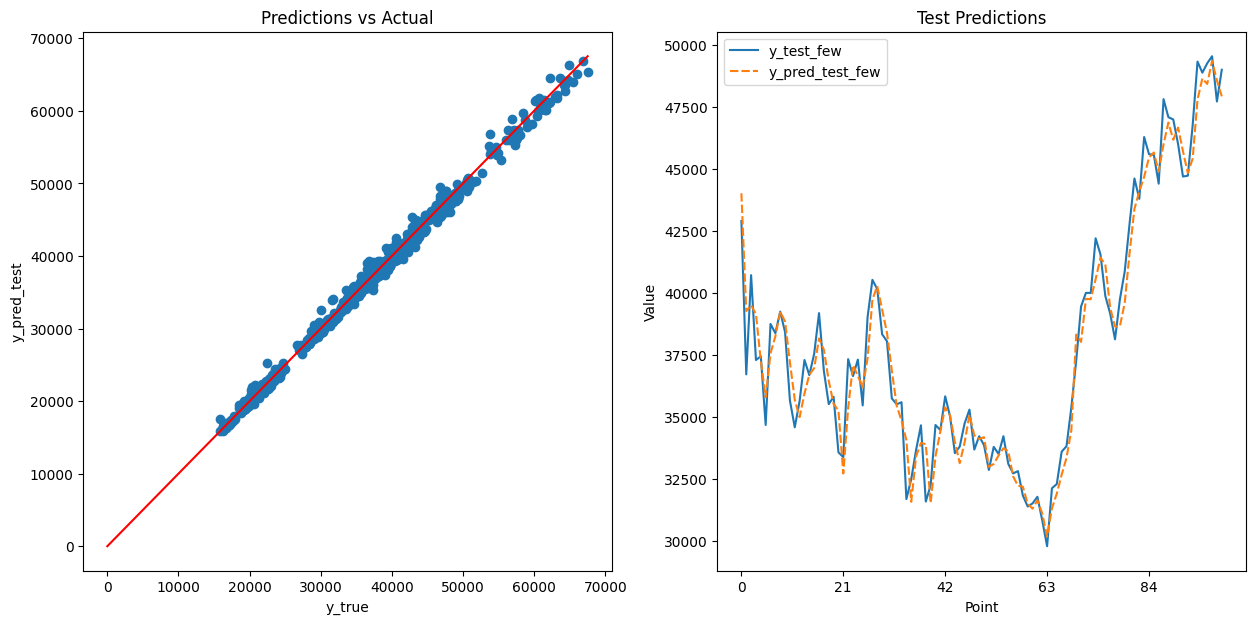

Important features: Index(['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'ETH', 'DJI', 'JP225'], dtype='object')


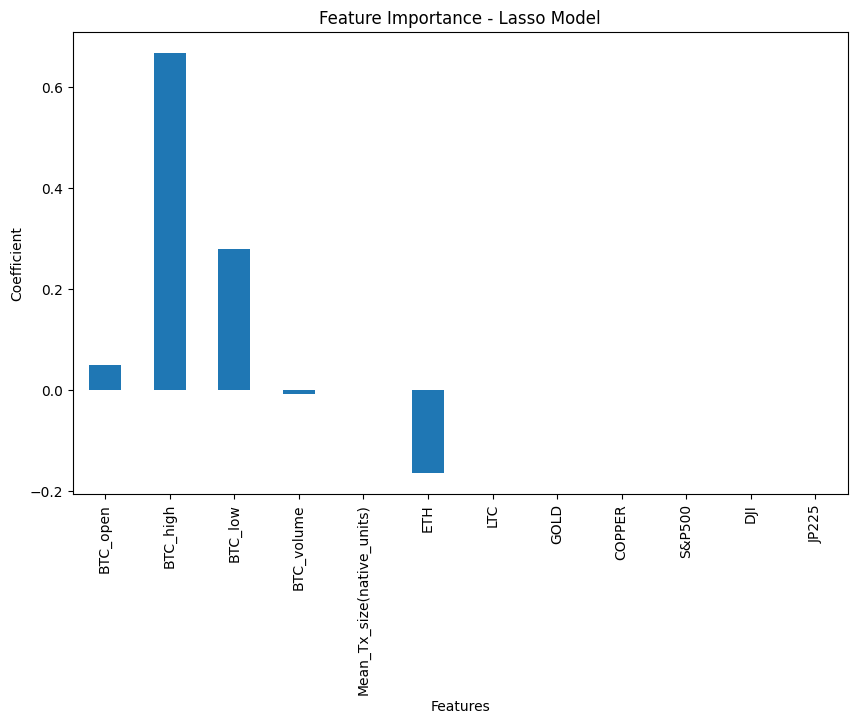

In [29]:
# Lasso với X_new2
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
import pandas as pd

# Chia train, valid, test: 1-... = 0.7, (0.15/0.85)*0.85=0.15, 015
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_new2, y, test_size=0.15, random_state=42, shuffle=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.15/0.85, random_state=42, shuffle=False)

# Huấn luyện mô hình Lasso để tìm alpha tốt nhất
lasso_model = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}  # create parameter

grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(X_train, y_train) 

print('Best_alpha_Lasso:', grid_search.best_params_['alpha']) # lấy best alpha 

# Use best_alpha train lại model trên toàn bộ train valid
best_alpha = grid_search.best_params_['alpha']
lasso_model_best_alpha = Lasso(alpha=best_alpha)
lasso_model_best_alpha.fit(X_train_valid, y_train_valid)

y_pred_test_lasso = lasso_model_best_alpha.predict(X_test)
Evaluate_Model(y_test, y_pred_test_lasso)
Plot_Model(y_test, y_pred_test_lasso, 100)
# Quan sát coef của các features: intercept = lasso_model_best_alpha.intercept_ # bias: hệ số điều chỉnh 
coef_np = lasso_model_best_alpha.coef_      # <class 'numpy.ndarray'>
coef_pdSeries = pd.Series(lasso_model_best_alpha.coef_, index=X_new2.columns) # tạo pandas Series obj chứa coef_ và index/gán nhãn nó = tên cột của X
        # <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col, tuple (index)

# Hiển thị các important features
important_features = X_new2.columns[coef_np != 0]
print('Important features:', important_features)


# Bar plot important features. 
plt.figure(figsize=(10, 6))
coef_pdSeries.plot(kind='bar')

plt.title('Feature Importance - Lasso Model')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()


In [30]:
X_new3 = data[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'ETH', 'DJI', 'JP225']]

# 4 - Đánh giá kết quả

| Metric     | Reg X | Reg X_new1 | Reg X_new2 |
| ---------- | ---------- | --------------- | --------------- |
| R2(~1)     | 0.9995     | 0.9989          | 0.9989          |
| MSE(min)   | 6012.373   | 289175.963      | 285777.986      |
| RMSE(min)  | 77.540     | 537.751         | 534.582         |
| MAE(min)   | 28.775     | 341.835         | 340.628         |
| MAPE%(min) | 65.63%     | 1.1%            | 1.12%           |
| AUC/DA ~ 1 | 0.6724     | 0.7627          | 0.7610          |

| Metric    | Ridge         | Lasso X,100 | Ridge X_new2 | Lasso X_new2,1000 |
| --------- | -------------| ------------| --------------|--------------|
| R2(~1)    | -0.464       | 0.996        | 0.999         | 0.9967        |
| MSE(min)  | 388460840.496| 632283.887  | 246574.974    | 569988.329   |
| RMSE(min) | 19709.409    | 795.162      | 496.563       | 754.976      |
| MAE(min)  | 15006.055    | 627.935      | 302.905       | 563.926      |
| MAPE%(min)| 47.2%        | 1.93%        | 1.12%         | 1.66%        |
| AUC/DA ~ 1| 0.507        | 0.666        | 0.759         | 0.6719       |

(Ridge và Lasso với X_new1 không cải thiện model gì nhiều. Cả Reg, Ridge, Lasso đều không cải thiện với X_new3)


# 5 - Tổng kết: 

| Metric     | Hold-out X_new1 |
| ---------- | --------------- |
| R2(~1)     | 0.9989          |
| MSE(min)   | 289175.963      |
| RMSE(min)  | 537.751         |
| MAE(min)   | 341.835         |
| MAPE%(min) | 1.1%            |
| AUC/DA ~ 1 | 0.7627          |



Coefficient of determination R2: 0.9989101386056467
Mean Squared Error MSE: 289175.9624615259
Root Mean Squared Error RMSE: 537.7508367836595
Mean Absolute Error MAE: 341.8346614164271
Mean Absolute Percentage Error MAPE% 1.1%
Area Under the Curve AUC/Directional Accuracy DA: 0.7626827171109201
       y_test   y_pred_test
3490   9895.5   9787.949450
3491  10151.5  10074.213616
3492   9854.1   9905.241369
3493  10229.5  10131.166943
3494  10317.7  10373.930597
...       ...           ...
4649  29886.4  29987.844708
4650  30387.4  30317.142550
4651  30472.5  30565.833973
4652  30299.6  30296.344230
4653  30310.3  30309.093852

[1164 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4868\2061749665.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


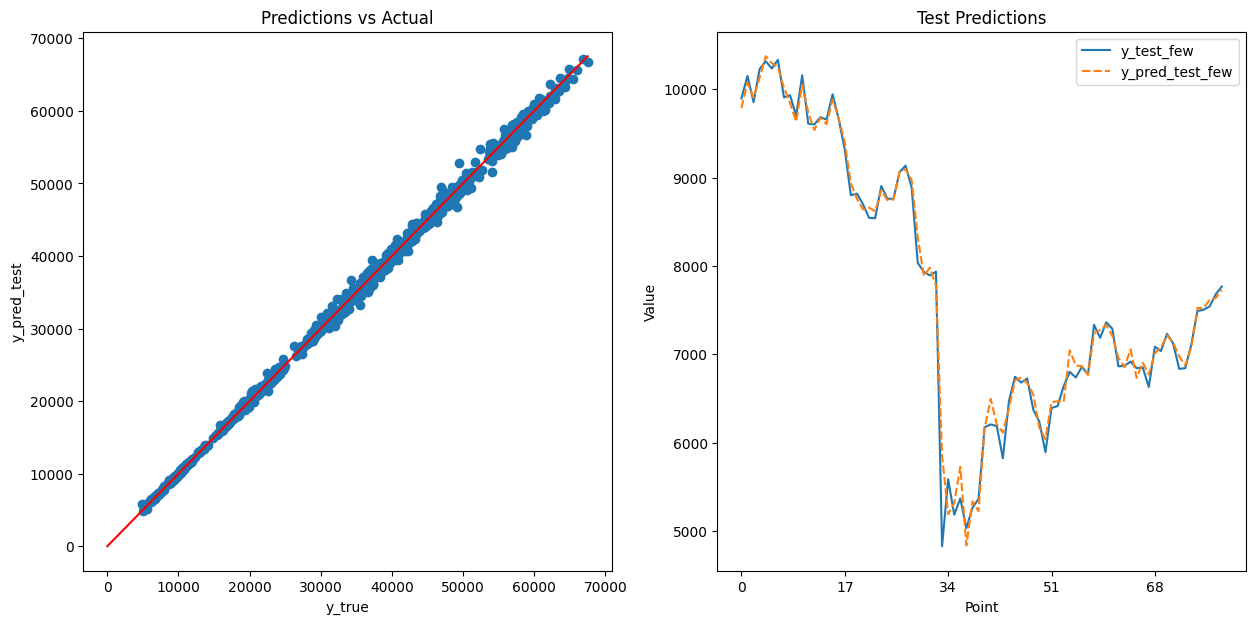

In [27]:
# Hold-out X_new1
X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.25, random_state=42, shuffle = False)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, 80)
